In [1]:
print('h')

h


In [85]:
import warnings
import math
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [46]:
transactions = pd.read_csv('/Users/hiradnourbakhsh/Desktop/INSY 695/Group Assignment/favorita-grocery-sales-forecasting/transactions.csv')



In [47]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [48]:
transactions = transactions.drop(columns = ['store_nbr'])

In [49]:
transactions

,date,transactions
0,2013-01-01,770
1,2013-01-02,2111
2,2013-01-02,2358
3,2013-01-02,3487
4,2013-01-02,1922
...,...,...
83483,2017-08-15,2804
83484,2017-08-15,1573
83485,2017-08-15,2255
83486,2017-08-15,932


In [50]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [51]:
transactions.index

RangeIndex(start=0, stop=83488, step=1)

In [52]:
transactions = transactions.groupby('date')['transactions'].sum().reset_index()

In [53]:
transactions

,date,transactions
0,2013-01-01,770
1,2013-01-02,93215
2,2013-01-03,78504
3,2013-01-04,78494
4,2013-01-05,93573
...,...,...
1677,2017-08-11,89551
1678,2017-08-12,89927
1679,2017-08-13,85993
1680,2017-08-14,85448


In [54]:
#btc.index = pd.to_datetime(btc['Date'], format = '%Y-%m-%d')

transactions.index = pd.to_datetime(transactions['date'], format = '%Y-%m-%d')

In [55]:
transactions.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1682, freq=None)

In [56]:
del transactions['date']

In [57]:
transactions

,transactions
date,
2013-01-01,770
2013-01-02,93215
2013-01-03,78504
2013-01-04,78494
2013-01-05,93573
...,...
2017-08-11,89551
2017-08-12,89927
2017-08-13,85993


In [58]:
y = transactions['transactions'].resample('MS').mean()

In [59]:
y

date
2013-01-01     73856.709677
2013-02-01     77486.250000
2013-03-01     79312.354839
2013-04-01     78163.500000
2013-05-01     79595.645161
2013-06-01     79740.200000
2013-07-01     77482.838710
2013-08-01     79391.580645
2013-09-01     79348.733333
2013-10-01     77691.612903
2013-11-01     78995.533333
2013-12-01     98762.200000
2014-01-01     77210.580645
2014-02-01     81363.107143
2014-03-01     82110.548387
2014-04-01     81855.533333
2014-05-01     80750.387097
2014-06-01     79971.466667
2014-07-01     78785.193548
2014-08-01     81857.161290
2014-09-01     81637.700000
2014-10-01     80751.935484
2014-11-01     81676.600000
2014-12-01    101636.100000
2015-01-01     80292.225806
2015-02-01     83785.142857
2015-03-01     84693.548387
2015-04-01     84445.166667
2015-05-01     86255.193548
2015-06-01     84363.433333
2015-07-01     84025.290323
2015-08-01     86292.161290
2015-09-01     84841.733333
2015-10-01     84209.161290
2015-11-01     84273.100000
2015-12-01    1

In [60]:
y.isnull().sum()

0

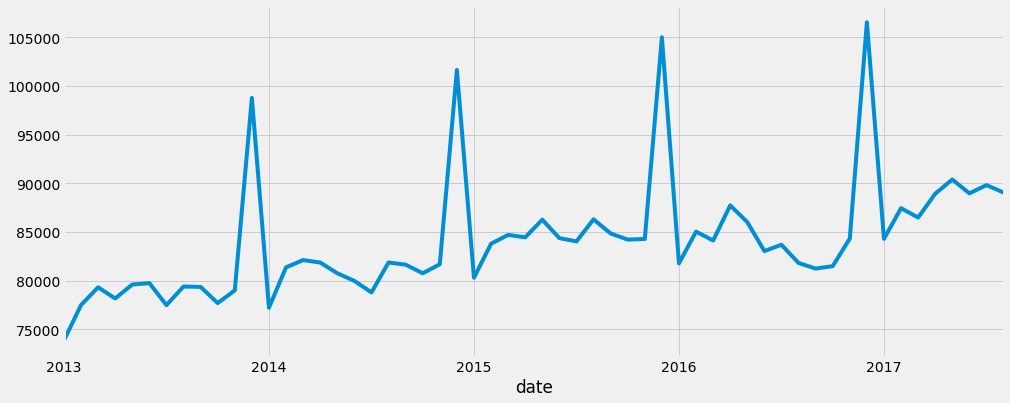

In [61]:
y.plot(figsize = (15,6))
plt.show()

Note the obvious seasonality (huge spike in transactions towards the end of the year) and the overall increasing trend.

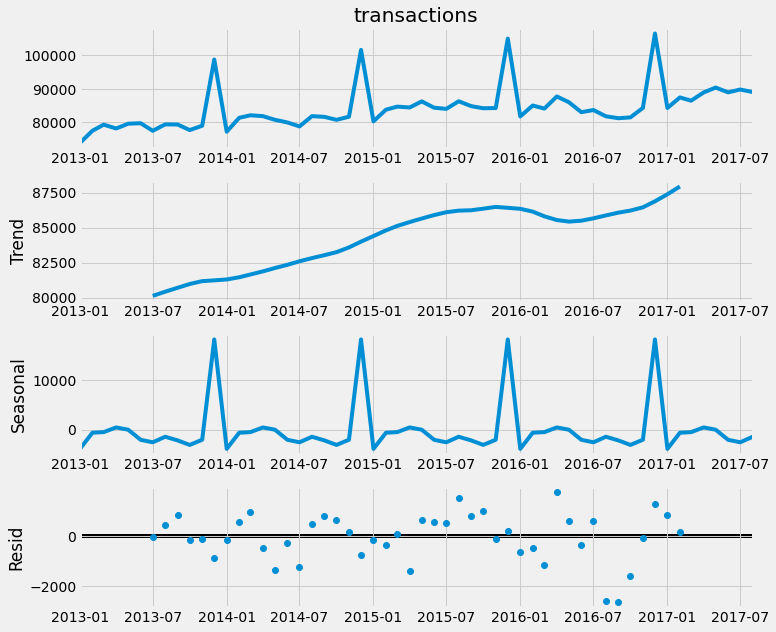

In [62]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,9

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
fig.show()

# Parameter Selection

In [88]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Potential paramater combinations:')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Potential paramater combinations:
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [64]:
warnings.filterwarnings('ignore')

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal,
                                           enforce_stationarity = False, enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1406.1034503710841
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1075.267036981642
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:820.421494645633
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1461.4312602567131
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:814.8094698336056
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:799.7531297962198
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:616.5265804024463
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1440.3322687892387
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1346.3624760521307
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1092.7311662742247
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:785.6502844552604
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1474.793764749354
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1085.6710533674743
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1038.587661232699
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:599.1969793184921
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1461.3357995574636
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1131.264341788375
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:835.419762097614
ARIMA

In [65]:
# use the following combination (lowest AIC of 516):
# ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:516.061805070915

In [66]:
mod = sm.tsa.statespace.SARIMAX(y, 
                                order = (0,1,1), 
                                seasonal_order = (1,1,1,12), 
                                enforce_stationarity = False, 
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                       transactions   No. Observations:                   56
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -254.031
Date:                            Thu, 17 Feb 2022   AIC                            516.062
Time:                                    20:33:33   BIC                            521.531
Sample:                                01-01-2013   HQIC                           517.775
                                     - 08-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2876      0.201     -1.431      0.152      -0.681       0.106
ar.S.L12      -0.5755      0.280   

In [67]:
# could get rid of ma.L1, ma.S.L12 (insignificant to model performance)

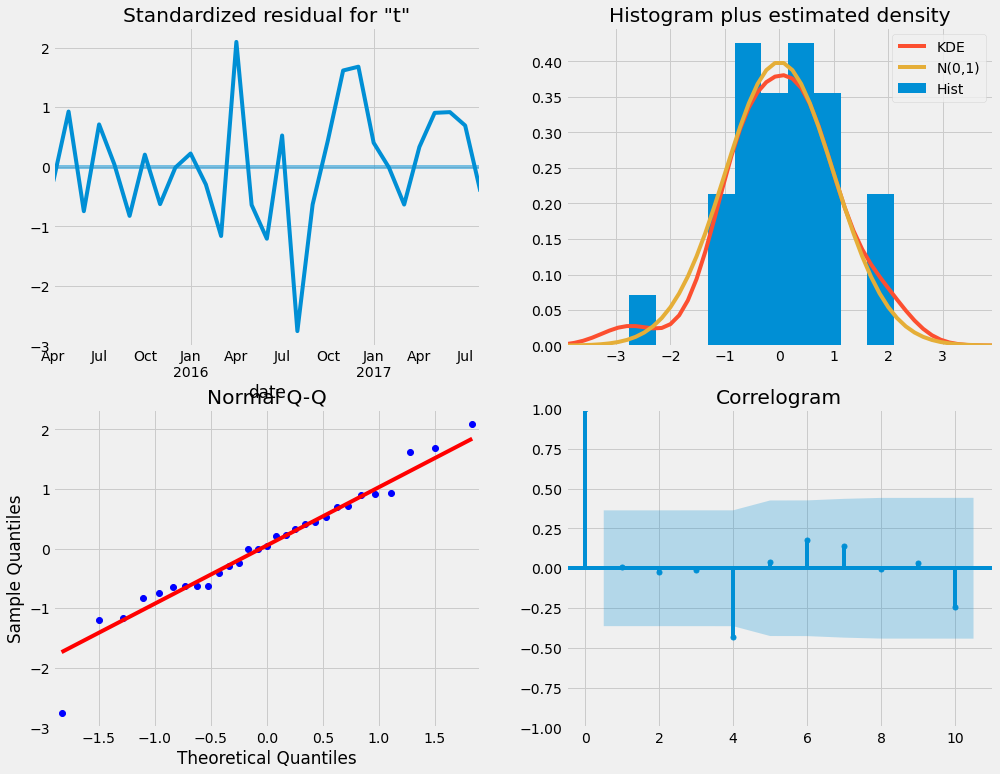

In [68]:
results.plot_diagnostics(figsize = (15,12))
plt.show()

In [69]:
# residuals are normally distributed

# Validating Forecasts

In [70]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

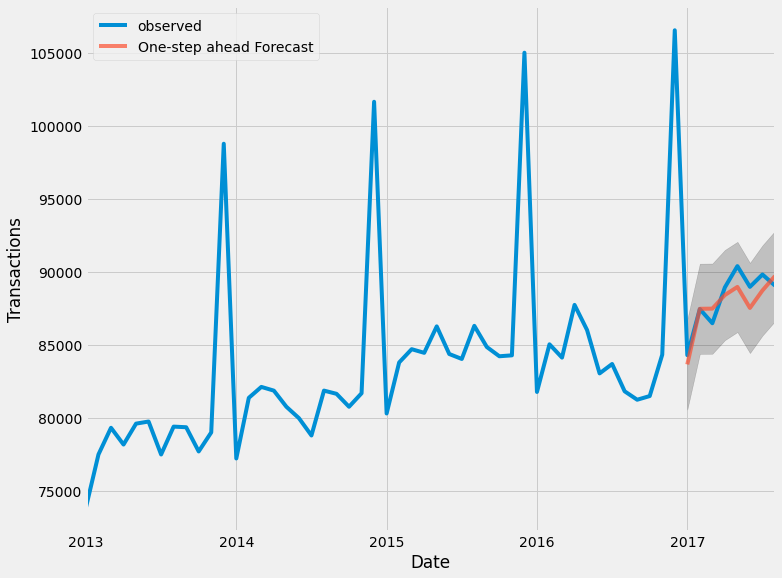

In [71]:
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Transactions')
plt.legend()

plt.show()

Our forecasts align well with the actual values.

In [87]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted - y_truth)**2).mean()
print('MSE = ', mse)
print('root MSE = ', math.sqrt(mse))

MSE =  927144.4782235622
root MSE =  962.8834188122477


In [80]:
# MAPE

import numpy as np

def mape(actual_value, predicted_value):
    actual_value, predicted_value = np.array(actual_value), np.array(predicted_value)
    return np.mean(np.abs((actual_value - predicted_value) / actual_value)) * 100

In [84]:
mape(y_truth, y_forecasted)

0.9589123194167788